In [1]:
### Run this cell before continuing.
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("tests.R")
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


### Heart Disease Prediction

**Introduction:**
We are going to dig deep into the attributions that  lead to heart disease and explore important questions such as how people’s  age, blood pressure, Cholesterol, max heart rate, ST depression can affect their heart disease on different levels. We will also find out which patients are most likely to suffer from a heart disease in the near future using the dataset and  features given.

Here, we will try to predict the presence of Cancer depending on different predictors.

We will answer the question prediction based on the following factors: 

age: Age of a person
sex: Gender 
BP: Blood Pressure level
cholesterol: Level of Cholesterol
max_HR: Max Heart Rate
ST_depression: ST depression Value
Heart_disease: Presence or Absence of Heart Disease




**Explporatory Data Analysis:**

We read and tidy the data. Then we create a training data set to work on our model. 

In [136]:
#Reading the data

heart_data <- read_csv("data/Heart_Disease_Prediction.csv",skip = 1,col_names= 
                          c("age", "sex", "chest_pain_type","BP", 'cholesterol','FBS_over_120',
                            'EKG_results', 'max_HR','exercise_angina','ST_depression','slope_of_ST',
                            'number_of_vessels_fluro','thalium','heart_disease')) 



head(heart_data)

Rows: 270 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): heart_disease
dbl (13): age, sex, chest_pain_type, BP, cholesterol, FBS_over_120, EKG_resu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain_type,BP,cholesterol,FBS_over_120,EKG_results,max_HR,exercise_angina,ST_depression,slope_of_ST,number_of_vessels_fluro,thalium,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence


In [137]:
#Tidying Data

heart_data <- heart_data |> 
             select(age,sex,BP,cholesterol,max_HR,ST_depression,heart_disease) |>
             mutate(heart_disease = as_factor(heart_disease), sex= as_factor(sex))
head(heart_data)

age,sex,BP,cholesterol,max_HR,ST_depression,heart_disease
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
70,1,130,322,109,2.4,Presence
67,0,115,564,160,1.6,Absence
57,1,124,261,141,0.3,Presence
64,1,128,263,105,0.2,Absence
74,0,120,269,121,0.2,Absence
65,1,120,177,140,0.4,Absence


In [138]:
#Creating Training Data And Exploratory Data Analysis

set.seed(2000);

heart_split <- initial_split(heart_data, prop = 3/4, strata = heart_disease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

num_obs <- nrow(heart_train)
heart_train |>
  group_by(heart_disease) |>
  summarize(
   count = n(),
   percentage = n() / num_obs * 100,
   avg_BP = mean(BP),
   avg_cholesterol = mean(cholesterol),
   avg_max_HR = mean(max_HR),
   avg_ST_depression = mean(ST_depression))
    


heart_disease,count,percentage,avg_BP,avg_cholesterol,avg_max_HR,avg_ST_depression
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Presence,90,44.55446,133.1556,255.8556,137.4667,1.6177778
Absence,112,55.44554,130.2768,244.8214,159.4554,0.6419643


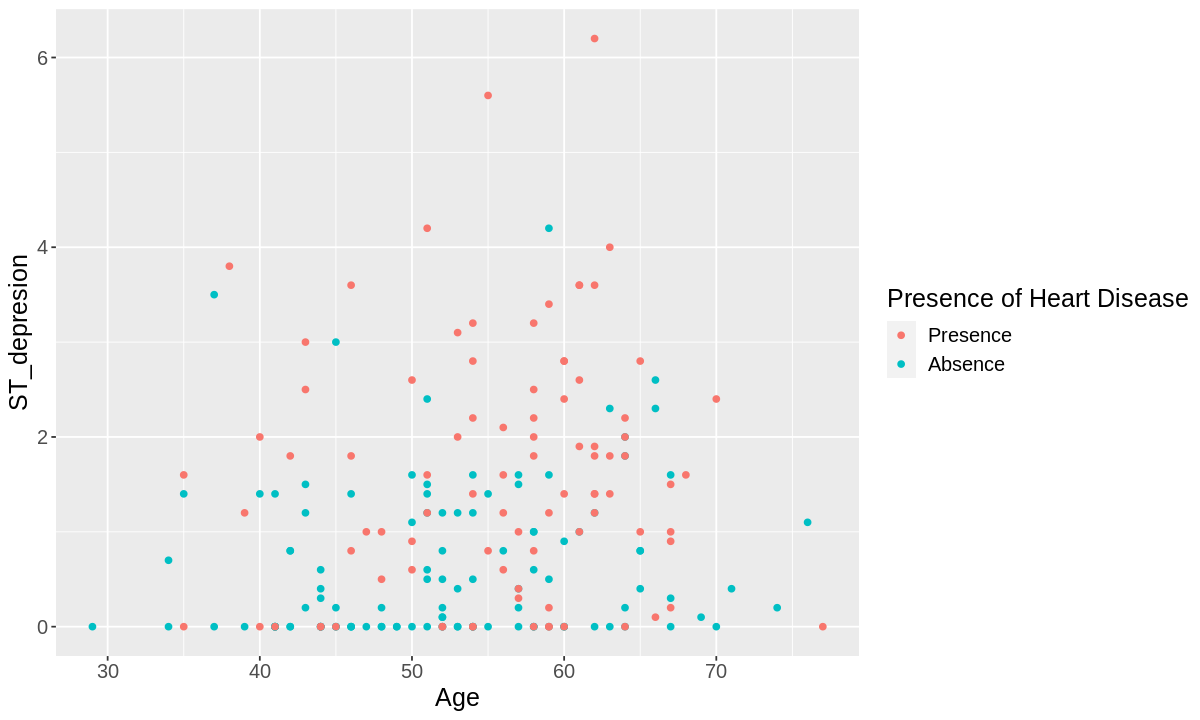

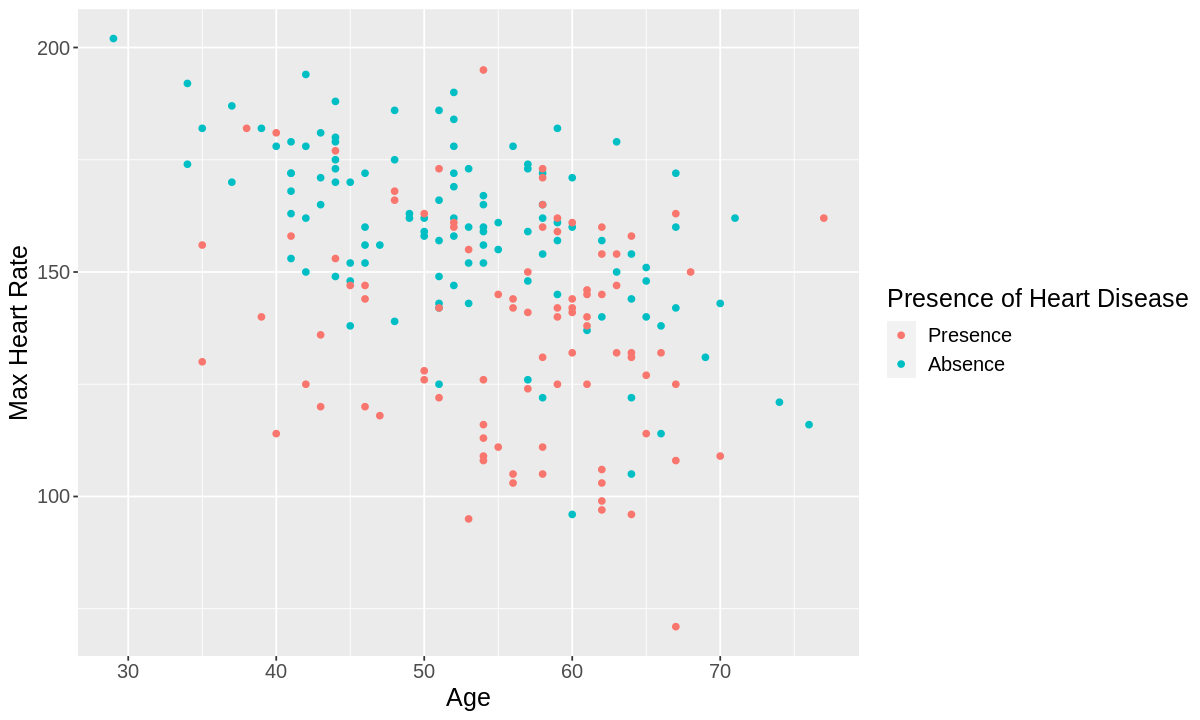

In [144]:
#Scatterplot of predictors showing relation between presence or absence of heart disease 

options(repr.plot.width = 10, repr.plot.height =6)
heart_disease_plot1 <- heart_train %>%
               ggplot(aes(x=age, y= ST_depression, color = heart_disease)) +
               geom_point() +
               labs(x= "Age",
                    y= "ST_depresion" ,
                    color = "Presence of Heart Disease") +
               theme(text = element_text(size=15))

heart_disease_plot2 <- heart_train %>%
               ggplot(aes(x=age, y= max_HR, color = heart_disease)) +
               geom_point() +
               labs(x= "Age",
                    y= "Max Heart Rate" ,
                    color = "Presence of Heart Disease") +
               theme(text = element_text(size=15))
heart_disease_plot1
heart_disease_plot2

**Method:**

Since the project is predicting whether a person has heart disease (categorical variable), a classification model is used to answer the predictive question. The K value for the models will be chosen by using 5-fold cross-validation. Gender blocks are used to create separate models for male and female in order to check whether gender affects the prediction.
The tentative variables to use for prediction are age, blood pressure, cholesterol, max heart rate, ST depression regarding research done on heart disease. However, clear correlations between these factors and heart disease will be determined after visualizations of relationships.

**Visualize:** 
We may visualize the results using a regression line to get idea on our prediction and fit.

**Expected Outcomes and Significance**

* What do you expect to find?
The expectations for the project is to figure out correlations between factors and whether a heart disease is presented. Furthermore, the correlations could be used to state a person has higher probability of having heart disease if he has the symptoms related to the correlations.


* What impact could such findings have?
A highly accurate classification model is helpful for physicians to diagnose heart disease for patients. Also, it can be a tool for patients to check whether they have chances of getting heart disease without going to hospitals. 


* What future questions could this lead to?
The classification model to predict whether heart diseases present is created without medical certifications. A future question is how medically accurate this model will be for practical uses. In addition, what are the reasons for the difference/similarity if the models for male and female are different from the general mode


